<a href="https://colab.research.google.com/github/JakeOh/202007_itw_bd18/blob/master/lab_python/python47_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pandas, pyplot, seaborn 패키지/모듈 import.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


seaborn 패키지의 샘플 데이터 mpg(mile per gallon) 데이터 프레임 로드.

In [2]:
mpg = sns.load_dataset('mpg')
mpg.iloc[:5]  # mpg.head(n=5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
mpg.iloc[-5:]  # mpg.tail(n=5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


mpg 데이터 프레임 구조 파악: shape, columns, (숫자 타입 데이터) 기술 통계량, (범주형 타입 데이터) 빈도수

In [4]:
mpg.shape

(398, 9)

In [5]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [6]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
mpg['origin'].value_counts()  # values의 내림차순으로 정렬해서 출력

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [8]:
mpg['name'].value_counts()

ford pinto                  6
toyota corolla              5
amc matador                 5
ford maverick               5
chevrolet chevette          4
                           ..
saab 99e                    1
chevrolet cavalier wagon    1
buick century limited       1
chevrolet nova custom       1
plymouth horizon miser      1
Name: name, Length: 305, dtype: int64

산점도 그래프(mpg ~ displacement): pyplot, seaborn

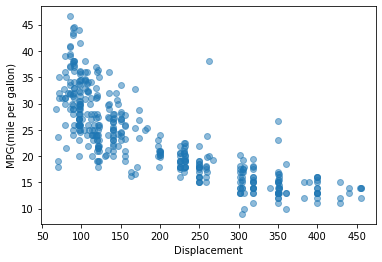

In [9]:
# plt.scatter(x=mpg['displacement'], y=mpg['mpg'])
plt.scatter(x='displacement', y='mpg', alpha=0.5, data=mpg)
plt.xlabel('Displacement')
plt.ylabel('MPG(mile per gallon)')
plt.show()

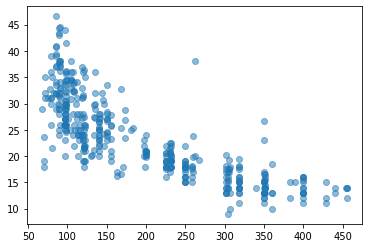

In [10]:
plt.plot('displacement', 'mpg', data=mpg, marker='o', linestyle='', alpha=0.5)
plt.show()

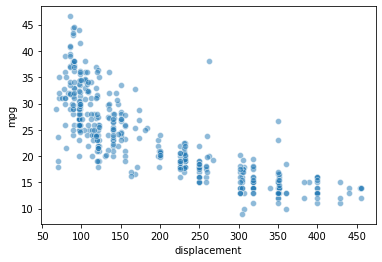

In [11]:
sns.scatterplot(x='displacement', y='mpg', data=mpg, alpha=0.5)
# plt.ylabel('mile per gallon')
plt.show()

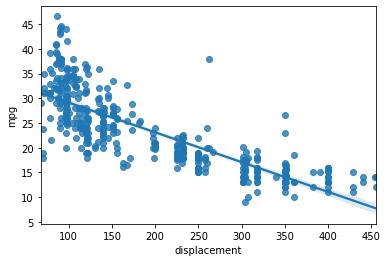

In [12]:
sns.regplot(x='displacement', y='mpg', data=mpg)
plt.show()

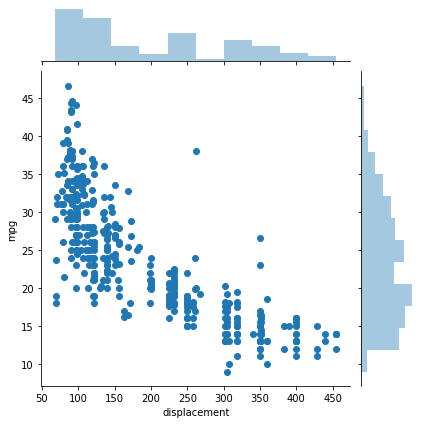

In [13]:
sns.jointplot(x='displacement', y='mpg', data=mpg)
plt.show()

*   2x2 subplot을 생성
*   산점도 그래프(mpg ~ cyclinders, mpg ~ horsepower, mpg ~ weight, mpg ~ acceleration)

[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe3dcc4ba8>, <matplotlib.axes._subplots.AxesSubplot object at 0x7efe3dd76668>, <matplotlib.axes._subplots.AxesSubplot object at 0x7efe3e2875f8>, <matplotlib.axes._subplots.AxesSubplot object at 0x7efe3ddc3dd8>]


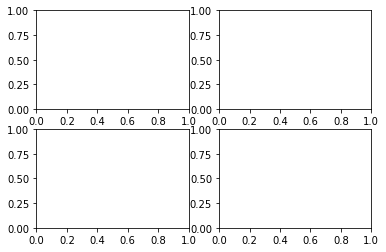

In [14]:
fig = plt.figure()
axes = []
for i in range(1, 5):
    axes.append(fig.add_subplot(2, 2, i))

print(axes)
plt.show()

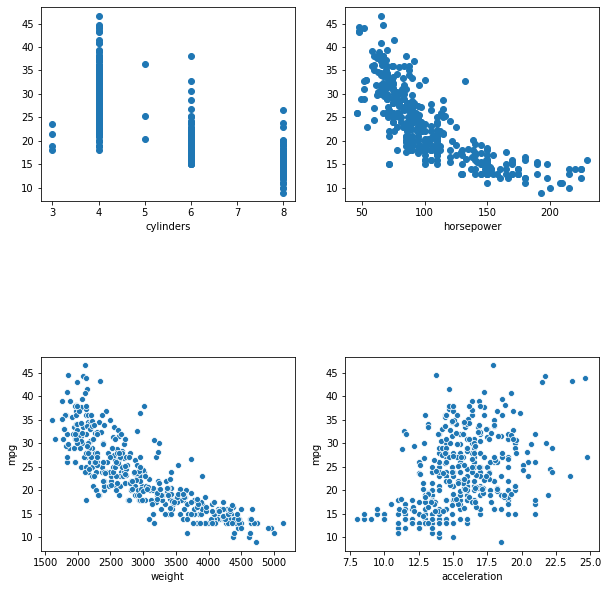

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
# fig.set_size_inches(w=10, h=10)

axes[0, 0].scatter(x='cylinders', y='mpg', data=mpg)
axes[0, 0].set_xlabel('cylinders')

axes[0, 1].scatter(x='horsepower', y='mpg', data=mpg)
axes[0, 1].set_xlabel('horsepower')

# axes[1, 0].scatter(x='weight', y='mpg', data=mpg)
sns.scatterplot(x='weight', y='mpg', data=mpg, ax=axes[1, 0])
axes[1, 0].set_xlabel('weight')

# axes[1, 1].scatter(x='acceleration', y='mpg', data=mpg)
sns.scatterplot(x='acceleration', y='mpg', data=mpg, ax=axes[1, 1])
axes[1, 1].set_xlabel('acceleration')

plt.subplots_adjust(hspace=0.8)  # horizontal space: subplot들 간의 수평 방향 간격
plt.show()

cylinder별 mpg의 평균 막대 그래프

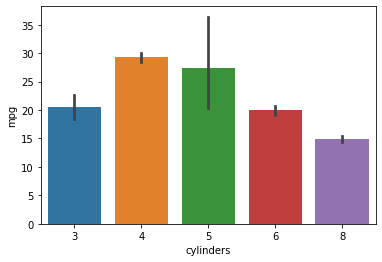

In [21]:
sns.barplot(x='cylinders', y='mpg', data=mpg)
plt.show()

In [34]:
mpg_by_cylinders = []  # empty list: 실린더 개수별 평균 연비 저장.

# mpg['cylinders'].value_counts().index
cylinders = mpg['cylinders'].unique()
print(cylinders)

for cyl in cylinders:
    mean_mpg = mpg[mpg['cylinders'] == cyl]['mpg'].mean()
    mpg_by_cylinders.append(mean_mpg)

print(mpg_by_cylinders)

[8 4 6 3 5]
[14.963106796116508, 29.28676470588236, 19.985714285714284, 20.55, 27.366666666666664]


In [38]:
# cylinders를 index로 하고, mpg_by_cylinders를 values로 하는 pandas.Series 객체 생성.
s = pd.Series(data=mpg_by_cylinders, index=cylinders)
s
# s.sort_index()
# s.sort_values()

8    14.963107
4    29.286765
6    19.985714
3    20.550000
5    27.366667
dtype: float64

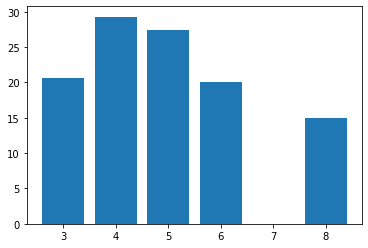

In [39]:
plt.bar(x=s.index, height=s.values)
plt.show()

cylinder별 mpg의 box plot

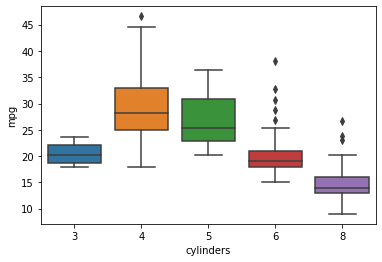

In [40]:
sns.boxplot(x='cylinders', y='mpg', data=mpg)
plt.show()

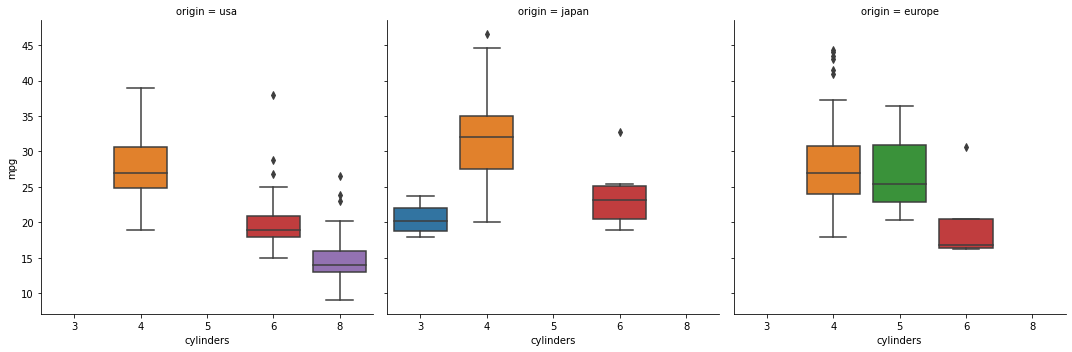

In [44]:
# origin별, cylinders별 mpg의 box plot - origin 별로 subplot을 생성.
sns.catplot(x='cylinders', y='mpg', data=mpg, col='origin', kind='box')
plt.show()

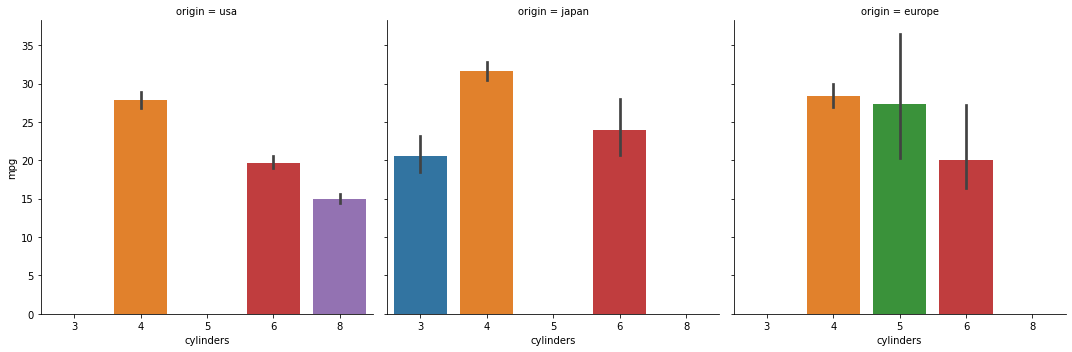

In [47]:
# catplot: origin별로 subplot 생성, cylinders별 mpg 평균 막대 그래프
sns.catplot(x='cylinders', y='mpg', data=mpg, col='origin', kind='bar')
plt.show()

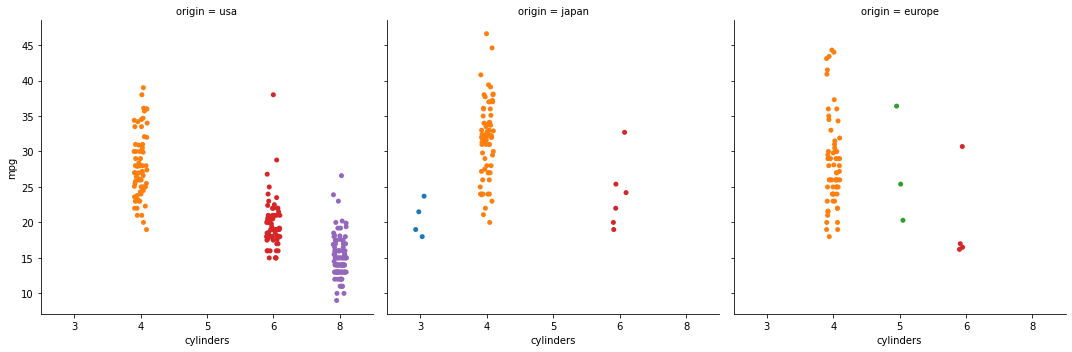

In [51]:
# catplot: origin별로 subplot 생성, mpg ~ cylinders의 산점도 그래프
sns.catplot(x='cylinders', y='mpg', data=mpg, col='origin')
plt.show()